<a href="https://colab.research.google.com/github/RodrigoTenorio86/Analises_Preditivas/blob/master/Analise_Publicidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
# Analise Graficas

import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
publicidade=pd.read_csv("/content/PublicidadeI.csv")
publicidade.head()

,Periodo,Propaganda,Desconto,Vendas
0,16-Feb,8.33,12.0,1528.5
1,16-Mar,83.33,5.5,1560.0
2,16-Apr,25.00,8.0,1419.0
3,16-May,41.67,4.0,1335.0
4,16-Jun,16.67,9.5,1462.5


In [4]:
publicidade.describe()

,Propaganda,Desconto,Vendas
count,17.000000,17.000000,17.000000
mean,55.000000,6.764706,1481.323529
std,29.356762,3.657687,140.740113
min,8.330000,0.500000,1281.000000
25%,33.330000,4.500000,1375.500000
50%,55.000000,6.500000,1462.500000
75%,80.000000,9.500000,1560.000000
max,100.000000,12.000000,1747.500000


In [5]:
publicidade.count()

Periodo       17
Propaganda    17
Desconto      17
Vendas        17
dtype: int64

In [6]:
publicidade.corr()

,Propaganda,Desconto,Vendas
Propaganda,1.000000,-0.119808,0.518405
Desconto,-0.119808,1.000000,0.779095
Vendas,0.518405,0.779095,1.000000


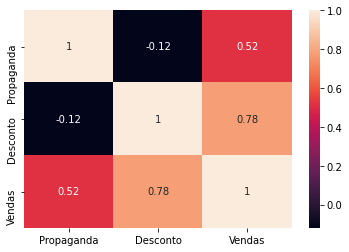

In [7]:
sns.heatmap(publicidade.corr(),annot= True)

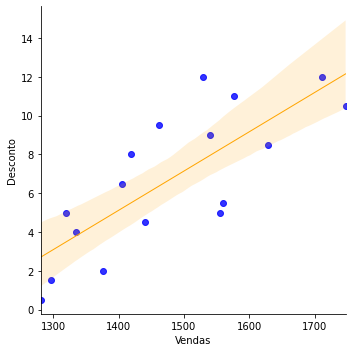

In [8]:
sns.lmplot("Vendas", "Desconto", publicidade,
           scatter_kws={"marker":"x","color":"blue"},
           line_kws={"linewidth":1, "color":"orange"})

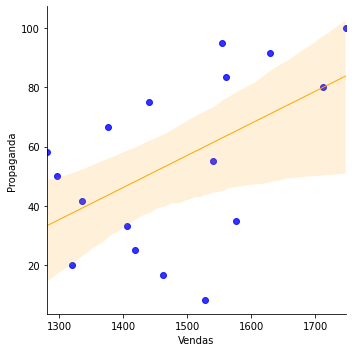

In [0]:
sns.lmplot("Vendas", "Propaganda", publicidade,
           scatter_kws={"marker":"x","color":"blue"},
           line_kws={"linewidth":1, "color":"orange"})

In [0]:
# Busca valores null  quanto mais desconto, maiores são as vendas

In [9]:
publicidade.isnull().any()

Periodo       False
Propaganda    False
Desconto      False
Vendas        False
dtype: bool

In [0]:
# Busca Outlirs 0

In [0]:
(publicidade==0).any()

Periodo       False
Propaganda    False
Desconto      False
Vendas        False
dtype: bool

Modelo de TReinamneto e teste

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
variaveis=['Propaganda' ,	'Desconto']
alvo=['Vendas']

x= publicidade[variaveis].values
y = publicidade[alvo].values

In [0]:
split_test_size=0.30
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=split_test_size, random_state=42)

In [13]:
print("{0:0.2f}% na base de treinamento".format((len(x_train)/len(publicidade.index))*100))

64.71% na base de treinamento


In [17]:
print("{0:0.2f}% na base de test".format((len(x_test)/len(publicidade.index))*100))

35.29% na base de test


In [14]:
from sklearn import linear_model

modelo_linear= linear_model.LinearRegression()

modelo_linear.fit(x_train,y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred= modelo_linear.predict(x_test)

print('R^2 score: %.2f'% r2_score(y_test,y_pred))

R^2 score: 0.96


# Salvar o Modelo

In [18]:
from sklearn.externals import joblib

joblib.dump(modelo_linear,'publicidade.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['publicidade.pkl']

In [0]:
publicidade_homolaga= joblib.load("publicidade.pkl")